___
# Part1 : setup
___

Imports libraries

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


Gets data

In [27]:
df = pd.read_csv("output_files/beta_values.csv")

In [28]:
df

,ID_REF,GSM4409578,GSM4409579,GSM4409580,GSM4409581,GSM4409582,GSM4409583,GSM4409584,GSM4409585,GSM4409586,...,GSM4409644,GSM4409645,GSM4409646,GSM4409647,GSM4409648,GSM4409649,GSM4409650,GSM4409651,GSM4409652,GSM4409653
0,cg00000029,0.651094,0.650451,0.634303,0.620983,0.599298,0.566119,0.675059,0.600194,0.615174,...,0.651123,0.615825,0.627343,0.660676,0.654224,0.640789,0.613980,0.643257,0.631593,0.646609
1,cg00000108,0.960434,0.954877,0.957124,0.948438,0.950022,0.949574,0.950393,0.950260,0.947326,...,0.953565,0.958739,0.953261,0.952710,0.951573,0.958350,0.955655,0.951422,0.955816,0.950133
2,cg00000109,0.899284,0.835354,0.886725,0.872381,0.872987,0.867569,0.892893,0.867972,0.861312,...,0.868461,0.896487,0.880993,0.889053,0.865207,0.893211,0.884844,0.886243,0.885892,0.884258
3,cg00000165,0.162039,0.155513,0.145876,0.172293,0.188915,0.154112,0.151555,0.168012,0.143774,...,0.169950,0.151252,0.158671,0.188231,0.191992,0.163816,0.184146,0.153689,0.160870,0.194933
4,cg00000236,0.859468,0.842830,0.846900,0.841603,0.841441,0.830110,0.847721,0.835056,0.833633,...,0.859549,0.859449,0.846702,0.846130,0.853704,0.863567,0.834595,0.854181,0.863500,0.847537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485507,ch.X.97129969R,0.106399,0.084349,0.078520,0.085321,0.087704,0.101639,0.066547,0.100942,0.087682,...,0.108720,0.098642,0.106998,0.135689,0.106309,0.091150,0.118813,0.105110,0.103181,0.138451
485508,ch.X.97133160R,0.058300,0.057811,0.062935,0.073651,0.074379,0.080662,0.054540,0.079483,0.064517,...,0.066883,0.057512,0.069941,0.080818,0.065354,0.061359,0.089145,0.077404,0.087354,0.075867
485509,ch.X.97651759F,0.021668,0.022383,0.020578,0.024936,0.023530,0.022732,0.020859,0.028809,0.022330,...,0.023730,0.022124,0.022571,0.020067,0.020535,0.022004,0.019939,0.024483,0.024555,0.023821
485510,ch.X.97737721F,0.046576,0.057818,0.051237,0.041242,0.045419,0.054944,0.056057,0.051111,0.054245,...,0.052063,0.054714,0.057164,0.043231,0.052307,0.057741,0.045730,0.059267,0.055258,0.045931


___
# Sandboxing
___

filtering CpG sites

In [63]:
df_measures = df.iloc[:,1:len(df.columns)]

means = []

for row in df_measures.itertuples():

    ave = sum(row)/len(row)
    means.append(ave)

min(means)
# df_measures['beta_mean'] = 

0.20603791402868246

In [64]:
row_variances = df_measures.var(axis=1)

In [67]:

min(row_variances)

1.735985020136081e-05

In [29]:
beta_matrix = df.iloc[:,1:len(df.columns)].to_numpy()
km = KMeans(n_clusters = 100, random_state = 0, n_init="auto")


In [30]:
beta_matrix

array([[0.65109401, 0.65045118, 0.63430307, ..., 0.64325669, 0.63159258,
        0.64660902],
       [0.96043359, 0.95487682, 0.95712419, ..., 0.95142183, 0.95581574,
        0.95013282],
       [0.89928366, 0.83535382, 0.88672506, ..., 0.88624312, 0.8858921 ,
        0.88425783],
       ...,
       [0.02166828, 0.02238301, 0.02057848, ..., 0.02448327, 0.02455513,
        0.02382133],
       [0.04657641, 0.05781808, 0.05123687, ..., 0.05926666, 0.05525756,
        0.0459313 ],
       [0.07733701, 0.06324668, 0.09094778, ..., 0.08443755, 0.09037614,
        0.09399574]], shape=(485512, 75))

___
 ## next2 sandbox cells: these gets a single cluster
___

creates df of a single cluster

In [ ]:
# run once to get set of labels 
labels = km.fit_predict(beta_matrix)
labels
df['labels'] = labels
df.head()


295

In [ ]:
# run for each cluster id number
cluster_df = df[df['labels'] == 3] # if looping; make this general

len(cluster_df)

295

In [ ]:
# labels = KMeans(n_clusters = 15, random_state = 0, n_init="auto").fit_predict(beta_matrix)

# nested_dict = {
#     'labels': labels,
#     'distortion': distortion
#     }

# candidates_dict[15] = nested_dict
# candidates_dict

___
# Part 3: CpG modules
___

In [ ]:
k_candidates = range(10, 101, 5)
candidates_dict = {}

for k in k_candidates:
    model = KMeans(n_clusters = k, random_state = 0, n_init="auto")
    lebels = model.fit_predict(beta_matrix)
    distortion = model.inertia_
    
    nested_dict = {
    'labels': labels,
    'distortion': distortion
    }

    candidates_dict[k] = nested_dict

In [56]:
candidates_dict

{10: {'labels': array([92, 65,  1, ..., 23, 91, 40], shape=(485512,), dtype=int32),
  'distortion': 36517.45095675447},
 15: {'labels': array([92, 65,  1, ..., 23, 91, 40], shape=(485512,), dtype=int32),
  'distortion': 25437.89639270646},
 20: {'labels': array([92, 65,  1, ..., 23, 91, 40], shape=(485512,), dtype=int32),
  'distortion': 21023.974650326112},
 25: {'labels': array([92, 65,  1, ..., 23, 91, 40], shape=(485512,), dtype=int32),
  'distortion': 17948.164317959316},
 30: {'labels': array([92, 65,  1, ..., 23, 91, 40], shape=(485512,), dtype=int32),
  'distortion': 16396.27730501788},
 35: {'labels': array([92, 65,  1, ..., 23, 91, 40], shape=(485512,), dtype=int32),
  'distortion': 15357.470740177218},
 40: {'labels': array([92, 65,  1, ..., 23, 91, 40], shape=(485512,), dtype=int32),
  'distortion': 14613.070736845622},
 45: {'labels': array([92, 65,  1, ..., 23, 91, 40], shape=(485512,), dtype=int32),
  'distortion': 13761.175671215995},
 50: {'labels': array([92, 65,  1, 

In [57]:
values = []
target_key = "distortion"

for inner_dict in candidates_dict.values():  # Assuming the top level is a dict of dicts
    
    if isinstance(inner_dict, dict) and target_key in inner_dict:
        values.append(inner_dict[target_key])

values

[36517.45095675447,
 25437.89639270646,
 21023.974650326112,
 17948.164317959316,
 16396.27730501788,
 15357.470740177218,
 14613.070736845622,
 13761.175671215995,
 13157.549306310724,
 12668.49046374486,
 12208.633881313011,
 11874.093985386138,
 11550.523254293828,
 11265.860647864592,
 11083.405809362377,
 10816.554072549254,
 10613.475753413753,
 10433.56668681691,
 10262.098425759323]

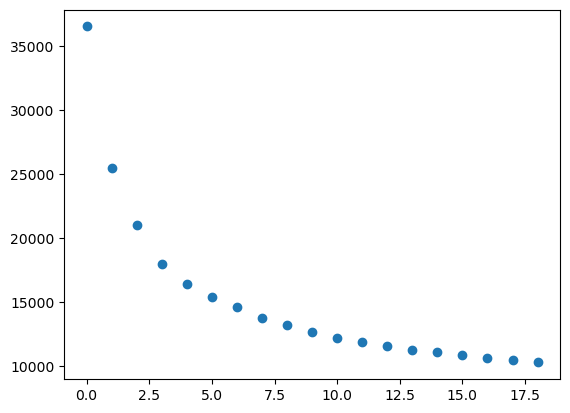

In [70]:
x = range(len(values))
y = values
plt.scatter(x, y)